In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import sys
import os

import numpy as np
import pandas as pd

In [2]:
IN_FILE = ("perf_node-foxy-test-case-05-2048x10.txt")
LIDAR_MODE = "2048x10"

df = pd.read_csv(IN_FILE, sep=",", header=0)

In [3]:
def plot_raw(df, title='', max_y=200):
    ax = df.plot(marker='.', linestyle='', ylim=(0, max_y), grid=True, title=title)
    ax.set_xlabel("Sample Number")
    ax.set_ylabel("Latency (ms)")
    return df

def plot_pct(df, title, max_y=200):
    df2 = df.quantile(q=np.linspace(0,1,df.shape[0]))
    ax = df2.plot(marker='x', linestyle='', ylim=(0, max_y), grid=True, title=title)
    ax.set_xlabel("% of sample")
    ax.set_ylabel("Latency (ms)")
    return df2

<IPython.core.display.Javascript object>


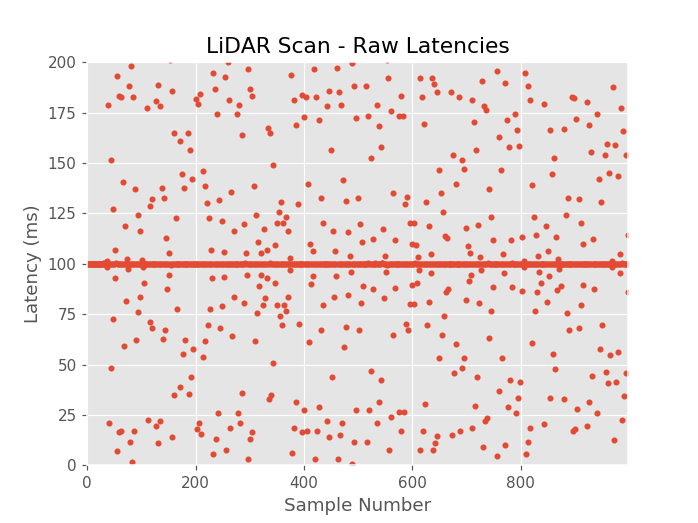

In [4]:
df2 = df.diff()*1e-6
df3 = df2['msg_stamp']
_ = plot_raw(df3, "LiDAR Scan - Raw Latencies")

<IPython.core.display.Javascript object>


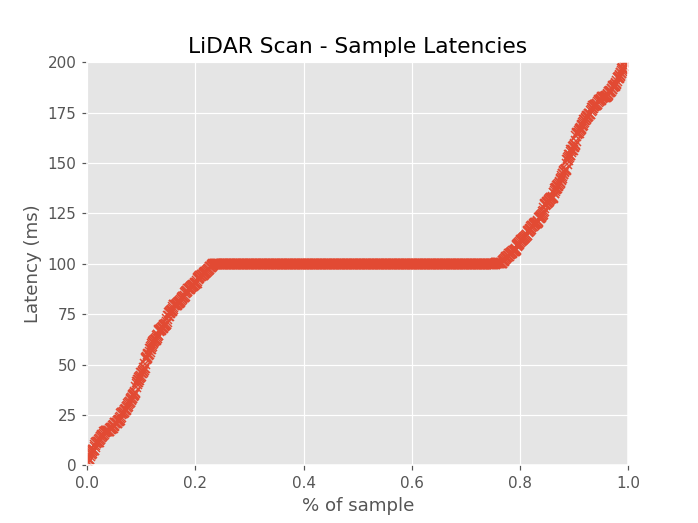

In [5]:
df4 = plot_pct(df3, "LiDAR Scan - Sample Latencies")

In [6]:
df3.describe()

count    999.000000
mean     100.698966
std       39.128312
min        0.783104
25%       99.858048
50%       99.995904
75%      100.143104
max      220.275968
Name: msg_stamp, dtype: float64

In [7]:
df3_median = df3.median()
df3_median

99.995904

In [8]:
# The MAD gives us: "the most typical deviation from the most typical latency of X ms will be Y ms".
np.abs(df3 - df3_median).median()

0.14156800000000658